# Bit Spalterei

In [1]:
%%javascript
// Konfiguration der Ausgabebereiche
// Deaktivierung der Autoscroll-Funktion bei der Ausgabe.
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import time
import pandas as pd
import matplotlib.pyplot as plt

## Bytes in Bitliste umwandeln und die Laufzeit messen

In [2]:
runtime = []

for x in range(1000000):
    start = time.time()
    result = []
    for value in [1,2,3,4]:
        result += [int(x) for x in bin(4)[2:].zfill(8)]
    result

    ende = time.time()
    runtime.append(ende - start)


In [22]:
df = pd.DataFrame(runtime)
df.columns = ['Sekunden']
df['Mikrosekunden'] = df['Sekunden'] * 1000000

## Laufzeiten (die ersten paar Zeilen)

In [23]:
df.head()

,Sekunden,Mikrosekunden
0,0.000017,16.927719
1,0.000010,10.251999
2,0.000010,9.775162
3,0.000009,9.298325
4,0.000009,9.298325


# Durchschnitt der Laufzeit in Mikro-Sekunden

In [43]:
print("Durchschnittliche Laufzeit:", df['Mikrosekunden'].mean())
print("Maximale Laufzeit:", df['Mikrosekunden'].max())
print("Minimale Laufzeit:", df['Mikrosekunden'].min())
print("Varianz der Laufzeit:", df['Mikrosekunden'].var())

Durchschnittliche Laufzeit: 9.089019775390625
Maximale Laufzeit: 4563.57002258
Minimale Laufzeit: 7.15255737305
Varianz der Laufzeit: 95.44940370671196


## Visualisierung der Laufzeiten

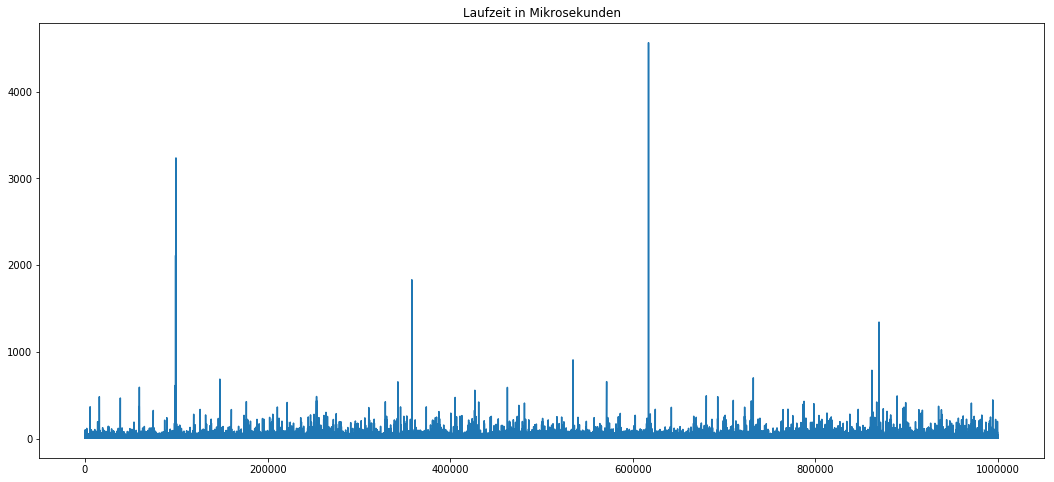

In [42]:
df['Mikrosekunden'].plot(figsize=(18,8),title='Laufzeit in Mikrosekunden')
plt.show()

## Rollender Durchschnitt

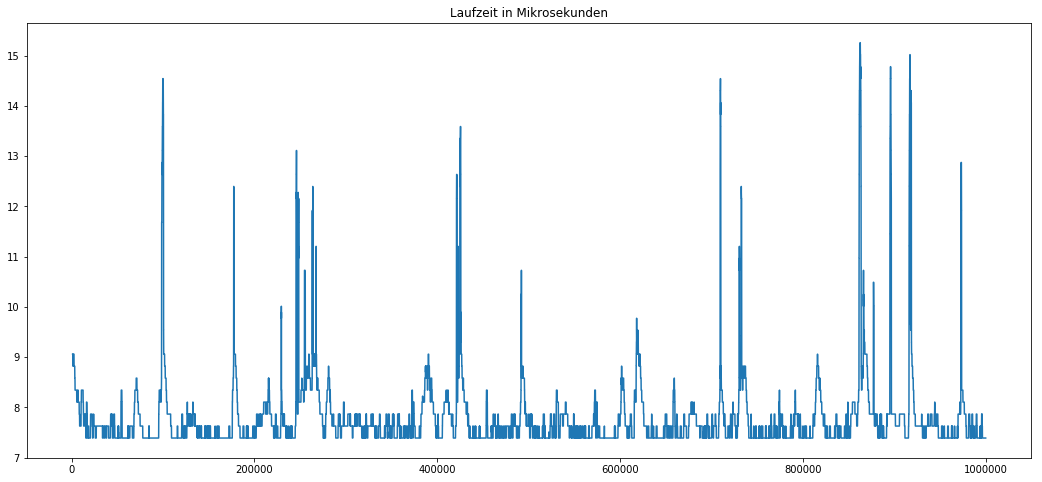

In [53]:
df['Mikrosekunden'].rolling(1000).median().plot(figsize=(18,8),title='Laufzeit in Mikrosekunden',style='-')
plt.show()

## Verteilung der Laufzeiten

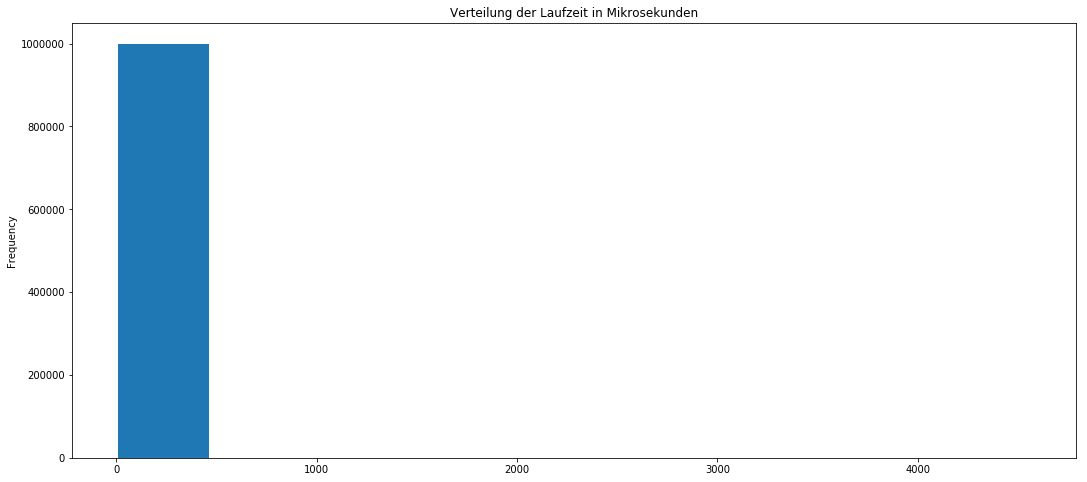

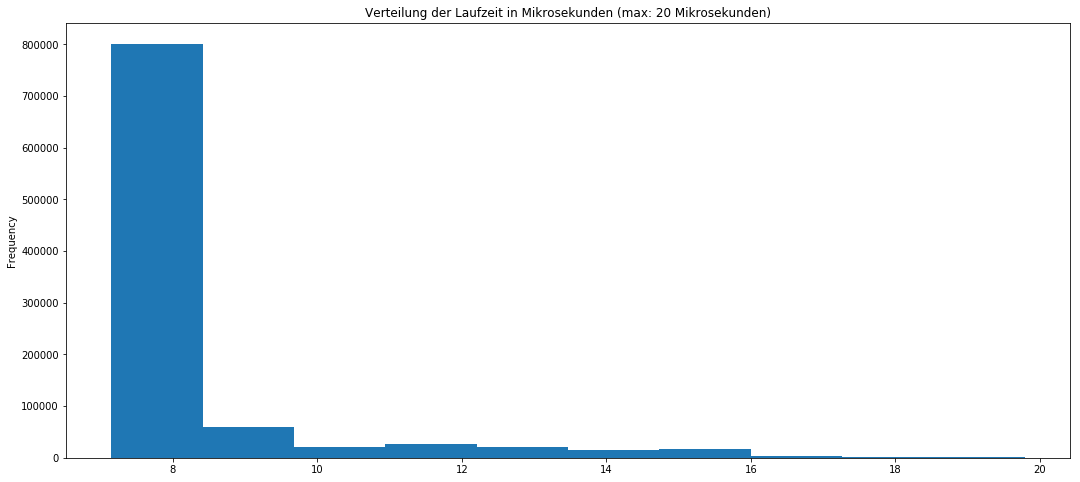

In [52]:
df['Mikrosekunden'].plot(figsize=(18,8),title='Verteilung der Laufzeit in Mikrosekunden', kind='hist')
plt.show()

df[df['Mikrosekunden']<20]['Mikrosekunden'].plot(figsize=(18,8),
                                                 title='Verteilung der Laufzeit in Mikrosekunden (max: 20 Mikrosekunden)', 
                                                 kind='hist')
plt.show()